### Data Analytics Online Career Accelerator
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Creating a random forest

**This is the solution to the activity.**

You have learned how to build a random forest model and how to test its accuracy. Now it’s time to apply your learning in a practical activity. You will use a familiar data set to build a random forest model and compare it to the binary logistic regression (BLR), support vector machine (SVM), and decision tree models built previously.

Do you remember Shen Lee? She’s a senior manager at Westside Hospital in Australia who has to write a report on the prediction and diagnosis of breast cancer. She decided to build a decision tree as part of classification predictive analysis, which helped her understand if breast cancer can be predicted based on some kind of detection measurement. Now, Shen decides to build a random forest model to compare its results with the BLR, SVM, and decision tree models and determine which is the most accurate.

To help her understand if breast cancer can be predicted based on some kind of detection measurement, Shen must create a random forest and compare the results with previous models.

Recap the steps of building a random forest with the following sorting exercise. Select each block to move it up and down until you're satisfied with the order. 

## 1. Prepare your workstation

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

## 2. Import the data set

In [2]:
# Import data into Python.
df = pd.read_csv('breast_cancer_data.csv', 
                 index_col='id')

# View the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [3]:
# Determine the number of null values.
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
# Determine descriptive statistics.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# All the null values will be dropped.
df.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [6]:
# Count the values.
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [7]:
# Determine if the data set is balanced.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## 3. Create a random forest model

In [8]:
# Import the necessary packages.
import imblearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Divide data into attributes and labels - all columns.
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

# Set columns.
target_col = 'diagnosis'
feature_cols = [c for c in df.columns if c != target_col]

# Set variables.
X = df[feature_cols]
y = df[target_col]

# Create test and train data sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Import necessary package.
from sklearn.ensemble import RandomForestClassifier

# Create a model.
forest=RandomForestClassifier(n_estimators=200, criterion='gini', 
                              min_samples_split=2, min_samples_leaf=2, 
                              max_features='auto', bootstrap=True, n_jobs=-1, 
                              random_state=42)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

## 4. Calculate accuracy of model

In [10]:
# Import necessary package.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[86  2]
 [ 5 50]]
              precision    recall  f1-score   support

           B       0.95      0.98      0.96        88
           M       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


## 5. Plot the random forest

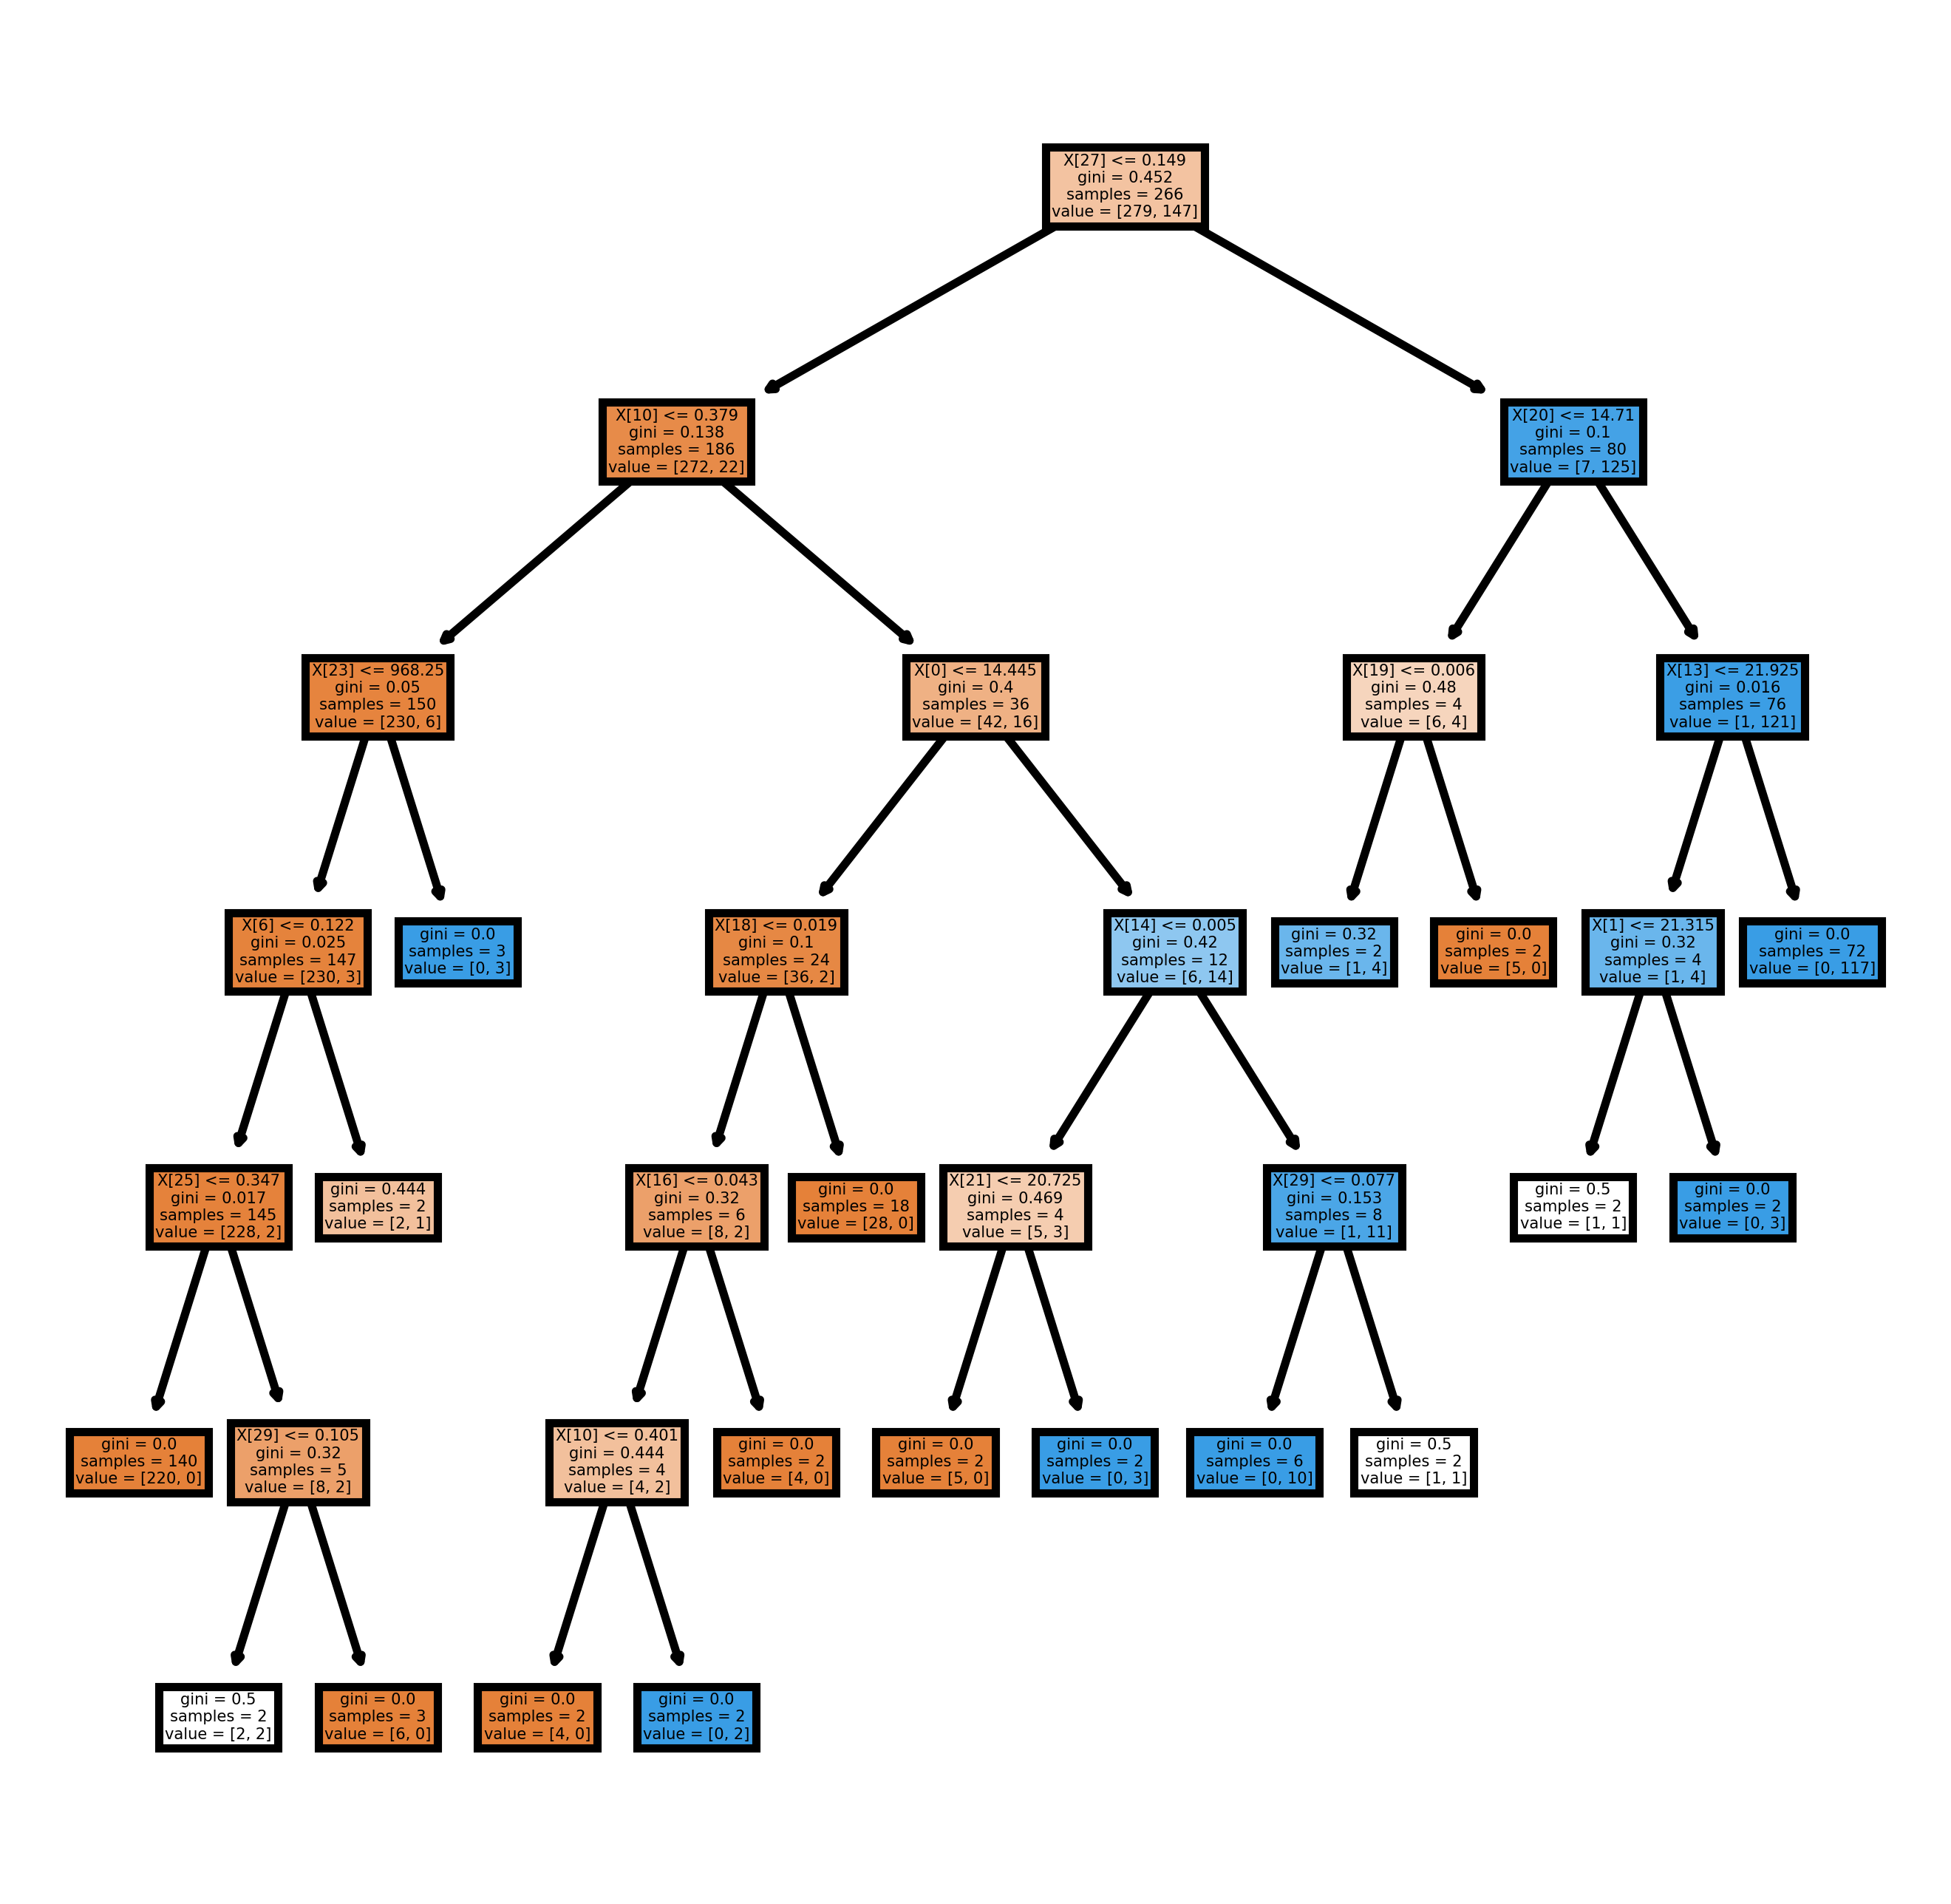

In [11]:
# Import necessary packages.
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(forest.estimators_[0],
               filled = True);
fig.savefig('rf_individualtree.png')